# seaborn_exercises

## Use the iris database to answer the following quesitons:

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from env import get_db_url, username, password, host
from pydataset import data

In [39]:
import seaborn as sns

In [4]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [5]:
iris = sns.load_dataset('iris')

In [6]:
data('iris', show_doc=True)


iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [13]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [57]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [58]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## 1. What does the distribution of petal lengths look like?

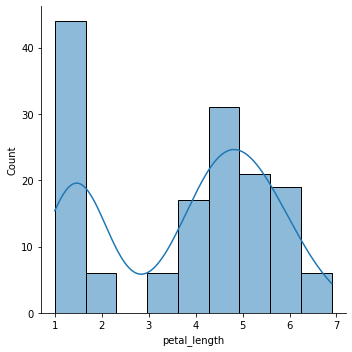

In [50]:
sns.displot(data = iris, x = 'petal_length', kde = True)

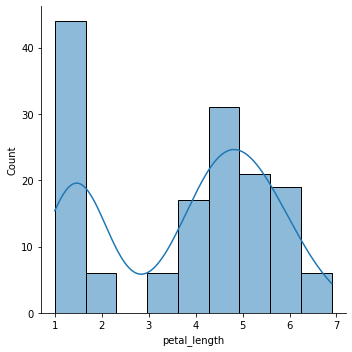

In [51]:
# Option 2
sns.displot(iris.petal_length, kde = True)

## 2. Is there a correlation between petal length and petal width? 
- Use http://guessthecorrelation.com/ as a hint 
- to how we could visually determine 
- if a correlation exists between two numeric columns.

In [52]:
iris.corr()

# Yes, there is a strong correlation at 0.962865

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


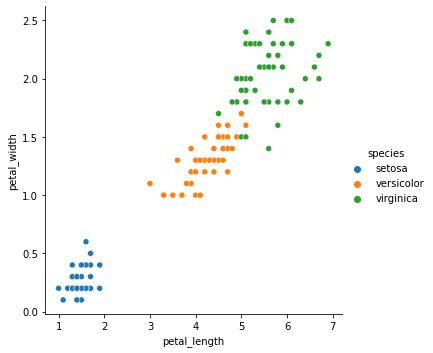

In [60]:
sns.relplot(x ='petal_length', y ='petal_width', data = iris, hue = 'species')



## 3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

## 4. Which features would be best used to predict species?

## 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 

In [22]:
df = sns.load_dataset('anscombe')
df.sample(10)

,dataset,x,y
28,III,6.0,6.08
37,IV,8.0,8.47
6,I,6.0,7.24
24,III,13.0,12.74
41,IV,8.0,5.56
2,I,13.0,7.58
9,I,7.0,4.82
17,II,6.0,6.13
12,II,8.0,8.14
0,I,10.0,8.04


### Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [23]:
df.groupby('dataset').describe()
# the summary statistics are mostly the same for Group I-III, 
# but group IV shows more vairation from the others. 

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

## 2. Plot the x and y values from the anscombe data. 
- Each dataset should be in a separate column.

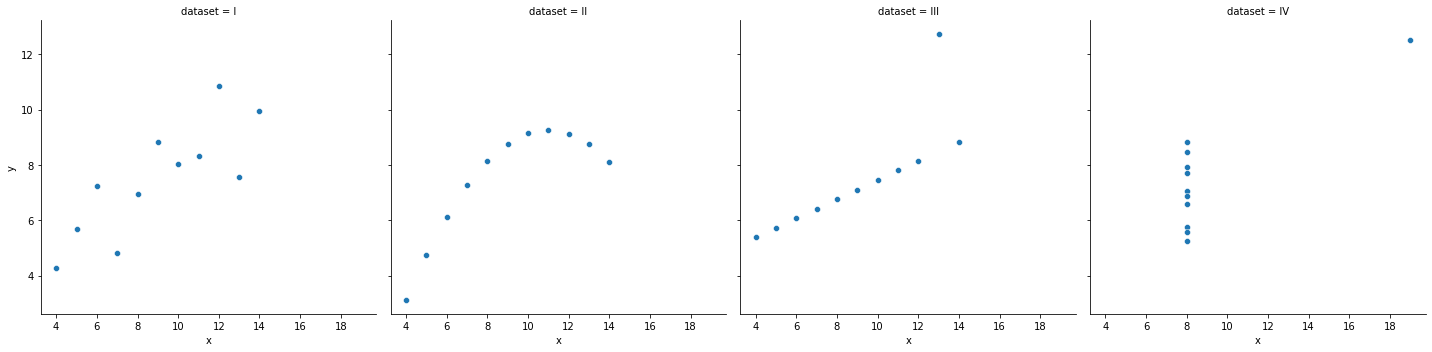

In [24]:
sns.relplot(data = df, x = 'x', y = 'y', col = 'dataset')
plt.show()

## 3. Load the InsectSprays dataset and read it's documentation. 

In [25]:
sprays = data('InsectSprays')
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [26]:
sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


## - Create a boxplot that shows the effectiveness of the different insect sprays.

Text(0, 0.5, 'insect count')

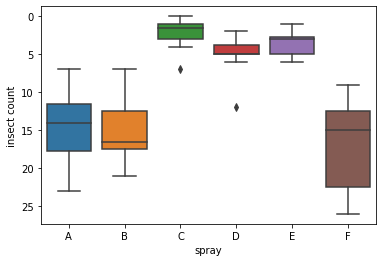

In [27]:
sns.boxplot(data=sprays, y='count', x='spray').invert_yaxis()
plt.ylabel('insect count')

## - Load the swiss dataset and read it's documentation. 
- The swiss dataset is available from pydatset rather than seaborn. 
- Create visualizations to answer the following questions:

In [28]:
swiss = data('swiss')
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [30]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


## Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [31]:
swiss['is_catholic'] = swiss.Catholic > 50
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


- Does whether or not a province is Catholic influence fertility? Not necessarily. Some areas that are not majority Catholic still have fertility rates above those that are Catholic.

- What measure correlates most strongly with fertility? Examination and Education (although negative correlation), being Catholic has the strongest positive correlation, but it is not a strong correlation.

In [36]:
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.402813
Name: Fertility, dtype: float64

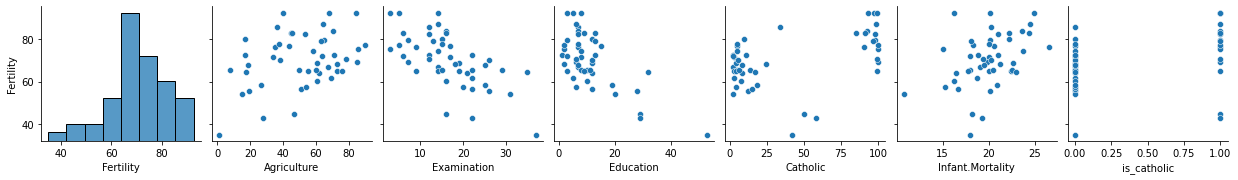

In [33]:
sns.pairplot(swiss, y_vars = 'Fertility')

## 4. Using the chipotle dataset from the previous exercise, 
- create a bar chart that shows 
- the 4 most popular items and the revenue produced by each.

In [45]:
url = get_db_url('chipotle')
sql = '''
SELECT *
  FROM orders;'''

In [48]:
orders = pd.read_sql(sql, url)
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [49]:
orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')

/var/folders/jx/x5_xzwy107g6d0zd021r2ph40000gn/T/ipykernel_70368/3139485877.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')


In [52]:
orders_byitem = orders.groupby('item_name')[['quantity', 'item_price']].sum()
orders_byitem.head()

,quantity,item_price
item_name,,
6 Pack Soft Drink,55,356.95
Barbacoa Bowl,66,672.36
Barbacoa Burrito,91,894.75
Barbacoa Crispy Tacos,12,120.21
Barbacoa Salad Bowl,10,106.40


In [55]:
four_most_popular_items = orders_byitem.nlargest(n=4, columns='quantity', keep='all').sort_values('item_price', ascending=False)
four_most_popular_items

,quantity,item_price
item_name,,
Chicken Bowl,761,7342.73
Chicken Burrito,591,5575.82
Steak Burrito,386,3851.43
Chips and Guacamole,506,2201.04


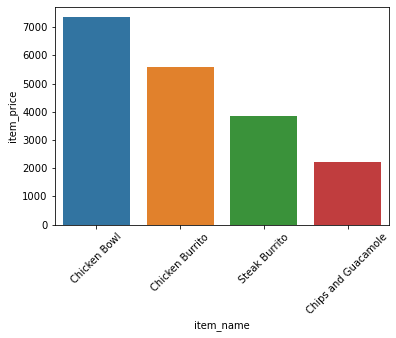

In [56]:
sns.barplot(x=four_most_popular_items.index, y='item_price', data=four_most_popular_items)
plt.xticks(rotation=45)
plt.show()

## 5. Load the sleepstudy data and read it's documentation. 


In [57]:
sleep = data('sleepstudy')
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

- Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [58]:
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [59]:
sleep.Subject = sleep.Subject.astype(str)

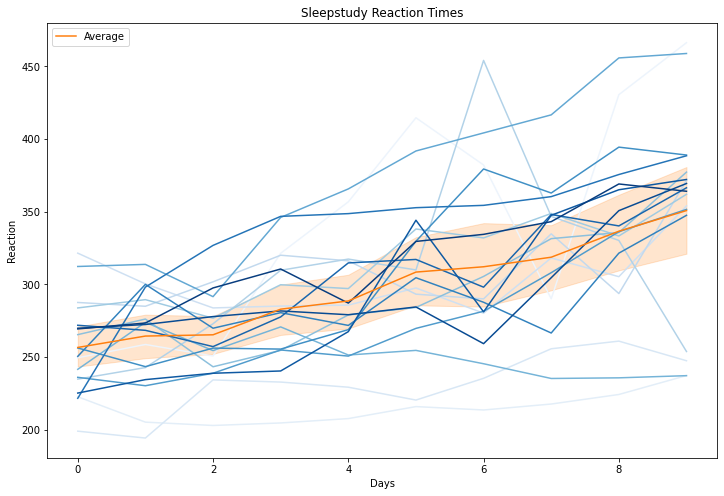

In [63]:
plt.figure(figsize = (12, 8))
sns.lineplot(data = sleep, x = 'Days', y = 'Reaction', hue = 'Subject', palette = 'Blues', legend = False)
sns.lineplot(data = sleep, x = 'Days', y = 'Reaction', label = 'Average')
plt.title('Sleepstudy Reaction Times');